In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [3]:
# Load the Iris dataset from CSV
df = pd.read_csv('IRIS.csv.xls')

In [4]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [6]:
# Summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000



Pairplot of the dataset:


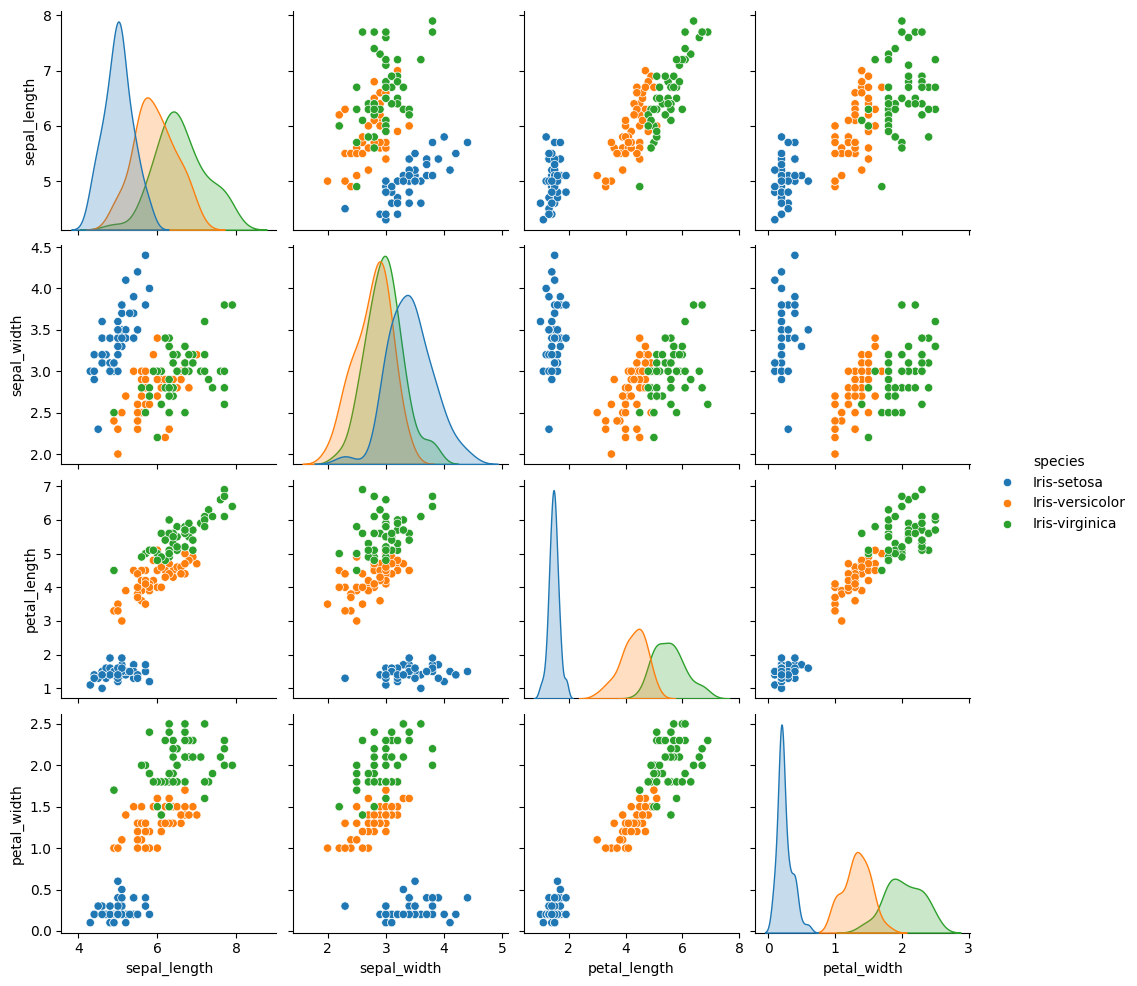

In [7]:
# Pairplot to visualize relationships between variables
print("\nPairplot of the dataset:")
sns.pairplot(df, hue='species')
plt.show()


Distribution of each feature:


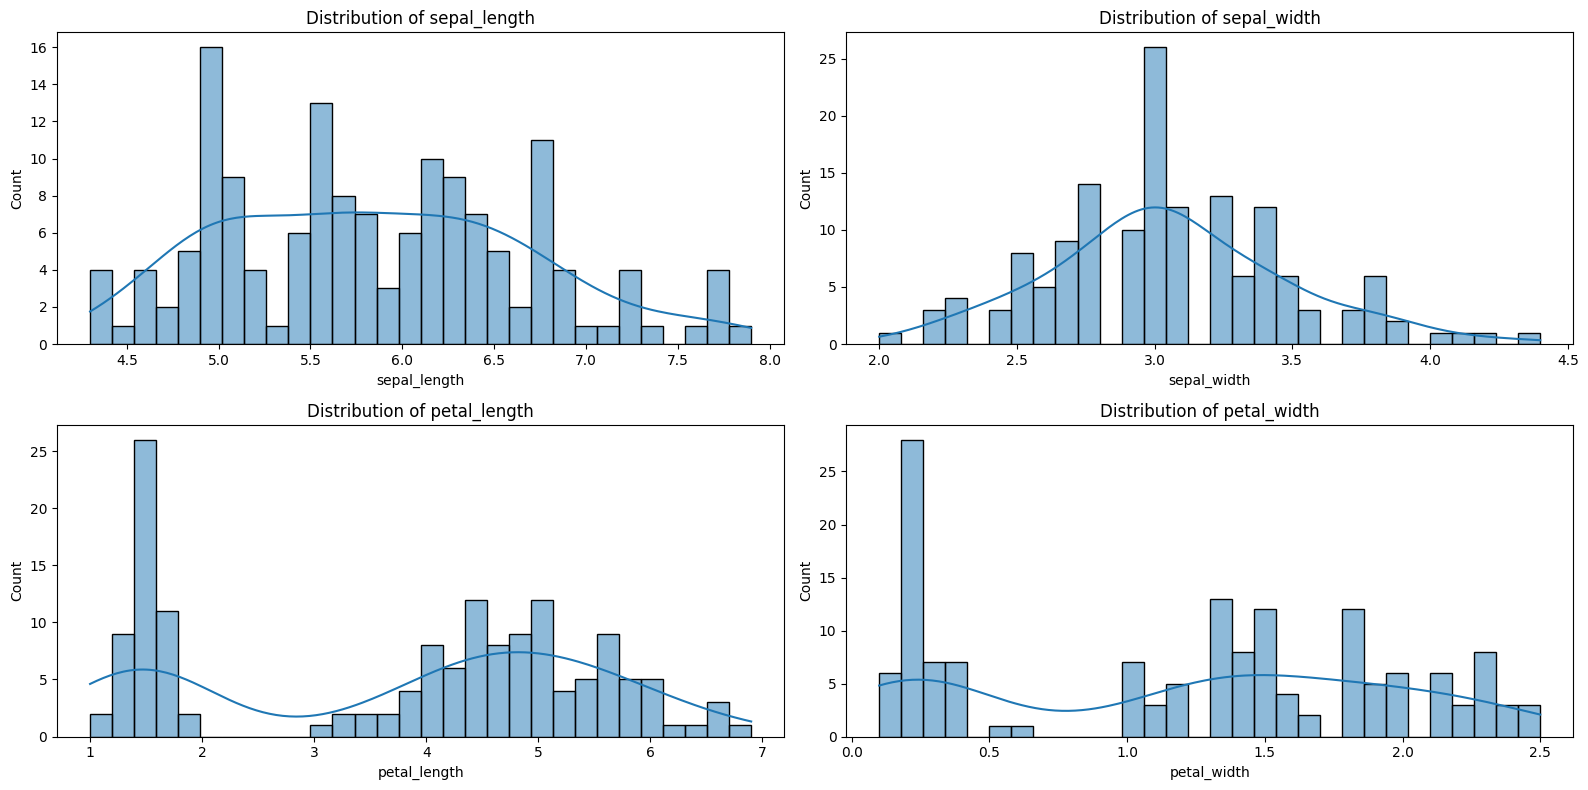

In [8]:
# Distribution of each feature
print("\nDistribution of each feature:")
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


Boxplot to check for outliers:


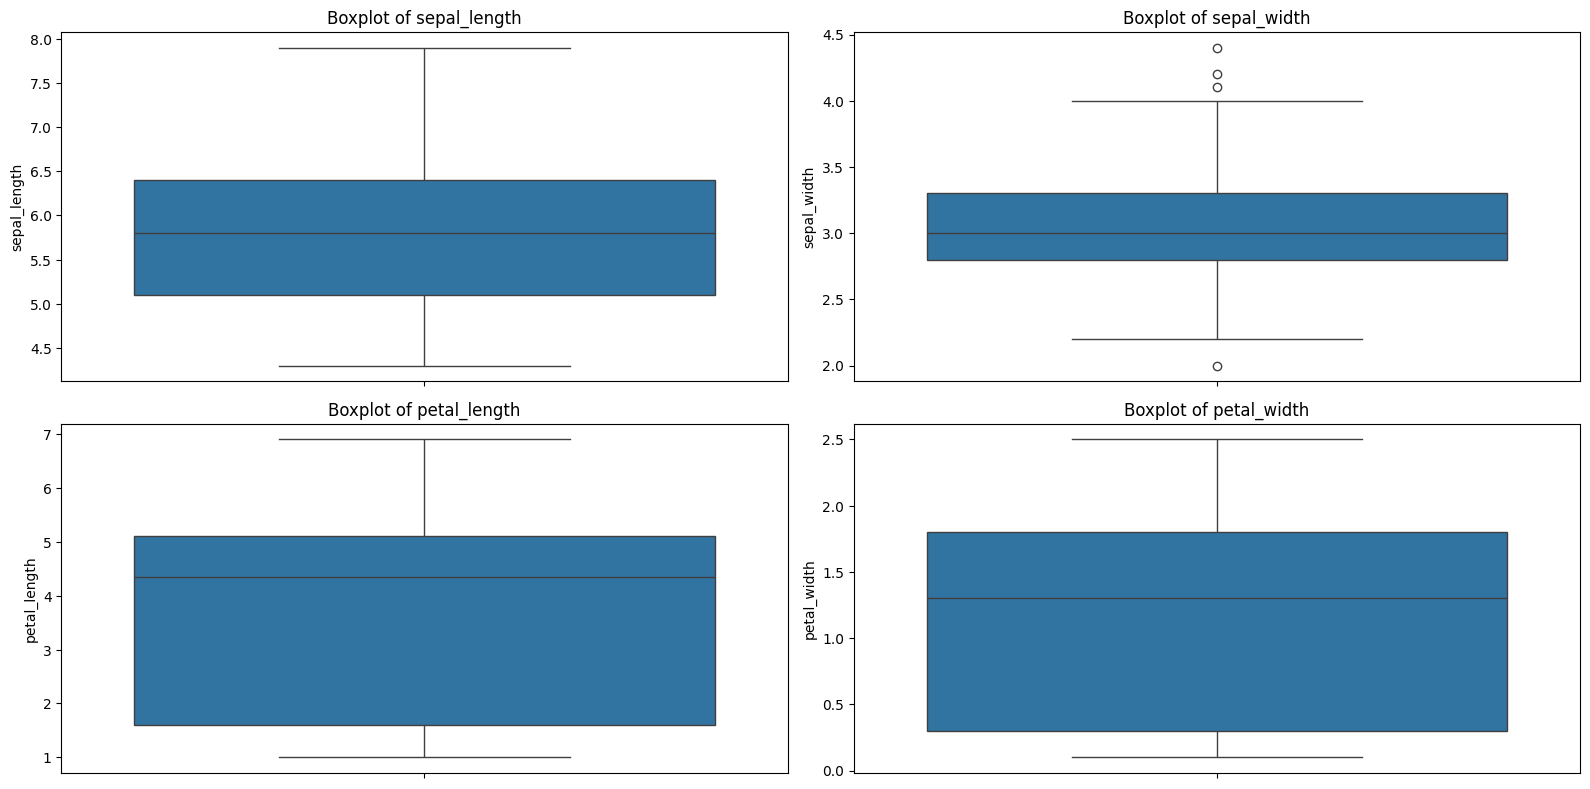

In [9]:
# Boxplot to check for outliers
print("\nBoxplot to check for outliers:")
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


Pairplot with different markers and sizes:


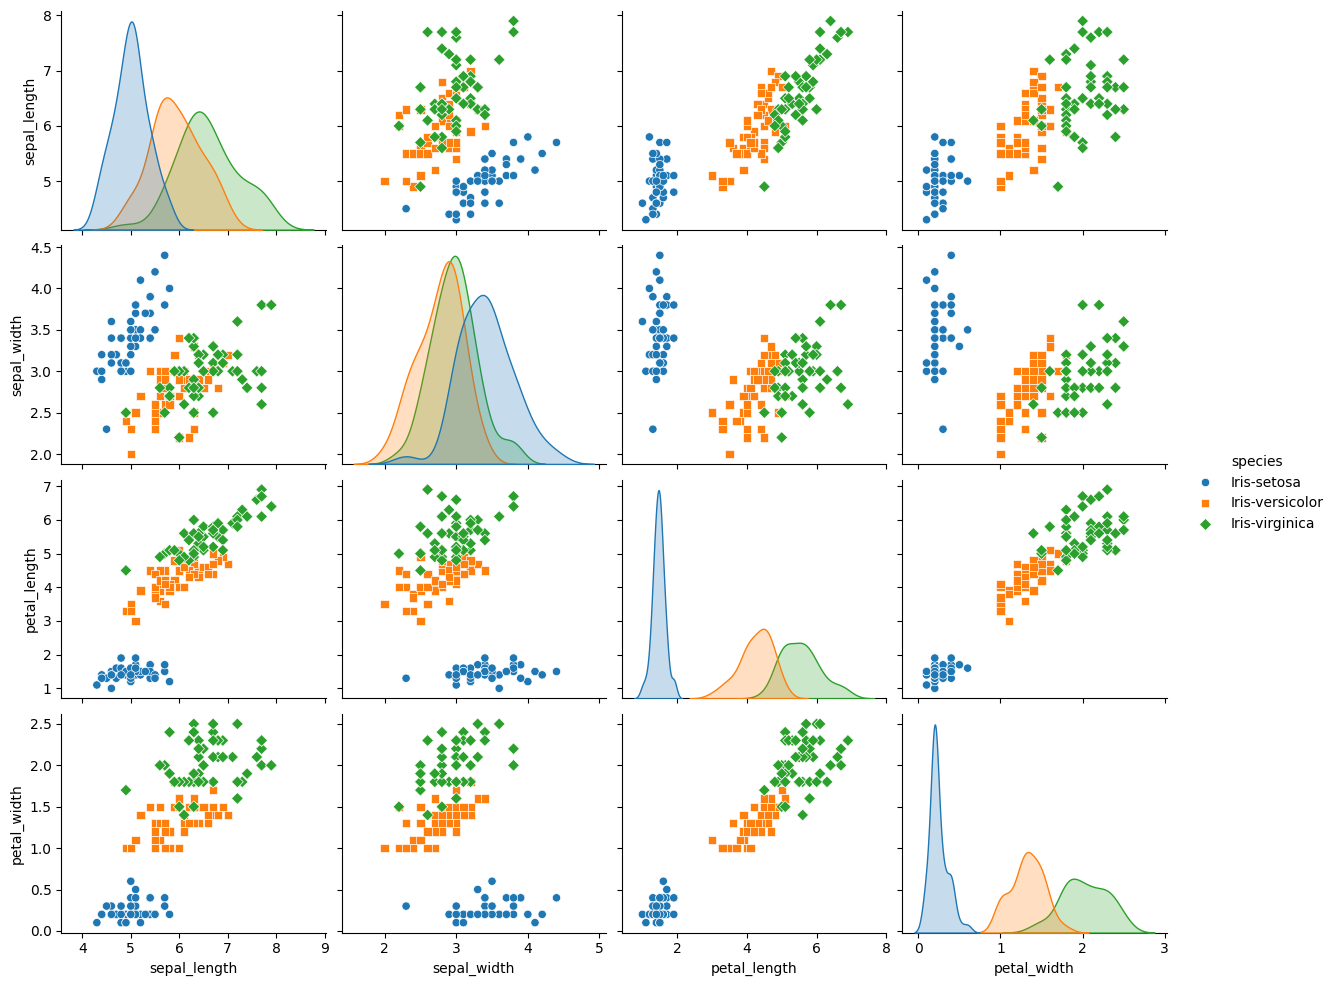

In [10]:
# Pairplot with different markers and sizes
print("\nPairplot with different markers and sizes:")
sns.pairplot(df, hue='species', markers=["o", "s", "D"], height=2.5, aspect=1.2)
plt.show()

In [11]:
# Data Preprocessing
X = df.drop('species', axis=1)
y = df['species']

In [13]:
# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [15]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [17]:
# Model Training
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)

In [19]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Accuracy Score:
1.0


In [21]:
# Save the model
joblib.dump(model, 'iris_random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [22]:
# Load the model (for testing purposes)
loaded_model = joblib.load('iris_random_forest_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_label_encoder = joblib.load('label_encoder.pkl')

In [27]:
# Test loading and predicting
sample_data = [[5.1, 3.5, 1.4, 0.2]]  # Example data
sample_data_scaled = loaded_scaler.transform(sample_data)
sample_prediction = loaded_model.predict(sample_data_scaled)
sample_prediction_label = loaded_label_encoder.inverse_transform(sample_prediction)
print(f"\nSample prediction: {sample_prediction_label}")


Sample prediction: ['Iris-setosa']


/Users/nehasharma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
